In [34]:
from utils.libs import *

In [35]:
def check_data(data_s):
    """Get right indeces for catch data to be displayed."""
    min_val = data_s.index.min()
    max_val = data_s.index.max()

    if min_val >= 0 and max_val <= 9:
        if min_val == 0:
            return 1, 10
        else:
            return 0, 10
    else:
        raise ValueError
    pass
def combine_series_benford(digits_a, digits_b, ax = None):

    # From pandas Series to pandas DataFrame to join them.
    # start, stop = check_data(digits_a)
    # digits_a_df = pd.DataFrame(digits_a[start:stop])
    digits_a_df = pd.DataFrame(digits_a)

    # start, stop = check_data(digits_b)
    # digits_b_df = pd.DataFrame(digits_b[start:stop])
    digits_b_df = pd.DataFrame(digits_b)
    
    digits_df = pd.concat([digits_a_df, digits_b_df], axis = 1)

    digits_df.columns = ['Ground Thruth', 'Predicted']
    digits_df.index = list(range(0, 9))

    # Produce graphics:
    # bar chart  - for showing occurences fractions in percentage.
    # line chart - for comparing against Benford's law reference curve.
    ax_bar = digits_df.plot(kind = 'bar', ax = ax)
    digits_df.plot(kind = 'line', ax = ax_bar)

    # Label x-axis for dispalying reasons.
    positions = list(range(0, 9))
    labels = [str(xx) for xx in list(range(1, 10))]

    # Compute Benford's law reference curve.
    x = np.linspace(1, 10)
    y = np.log10(1 + 1 / x) * 100

    # Check whether to add final plot to complex of images
    # or plot a single image.
    if ax is None:
        # Add Benford's law reference curve.
        x = np.linspace(0, 9)
        ax_bar.plot(x, y, linestyle='dashed', color = 'black', label = 'Benford\'s reference')

        x = np.arange(1, 9+1)
        y = np.log10(1 + 1 / x) * 100
        x = np.arange(0, 9)
        ax_bar.bar(x, y, color = 'orange', alpha = 0.5, lw=3, label = 'Benford\'s reference')

        _ = plt.xticks(positions, labels)
        plt.legend()
        plt.title('Benford Law - Images')
    else:
        # Add Benford's law reference curve.
        x = np.linspace(0, 9)
        ax.plot(x, y, linestyle='dashed', color = 'black', label = 'Benford\'s reference')

        x = np.arange(1, 9+1)
        y = np.log10(1 + 1 / x) * 100
        x = np.arange(0, 9)
        ax.bar(x, y, color = 'orange', alpha = 0.5, lw=3, label = 'Benford\'s reference')

        # ax.set_xticks(positions, labels)
        ax.set_xticklabels(labels)
        ax.legend()
        
    pass

In [36]:
# def create_benford_graph(data, title = 'Benford\'s Law graph', label_bar_graph = 'bar chart', label_line_graph = 'line chart') -> pd.Series:
def create_benford_graph(digits_s, title = 'Benford\'s Law graph', label_bar_graph = 'bar chart', label_line_graph = 'line chart') -> pd.Series:
    """
    Create a graph for comparing Benford 's Law reference curve against the
    bar chart graphics obtained from input data.

    Parameters:
    -----------
    :data: iterable object-like such as np.ndarray, list.\n
    :title: str, (default: 'Benford\'s Law graph') graph's title.\n
    :label_bar_graph: str, (defautl: 'bar chart') data label for bar chart.\n
    :label_line_graph: str, (defautl: 'line chart') data label for line chart.

    Return:
    -------
    :digits_s: pandas.Series, containing (index , value) where index content are
               number in the range (0, 9) edges included, while value is a floating-point
               number representing the fraction in percentage of occurences of its relative leading
               digit.

    """

    """
    # Generate data to be displayed, from imput data.
    s = pd.Series(data)
    s_result = s.map(get_leading_digit)

    data_counter = Counter(s_result)

    digits_counter_dict = dict(sorted(data_counter.items(), key = lambda xi: xi[0]))

    tot = sum(data_counter.values())

    digits_s = pd.Series(digits_counter_dict)
    digits_s = digits_s / tot * 100
    """
    # Create new figure obj.
    fig = plt.figure()

    # Bar chart for generated data, from input data.
    ax = digits_s.plot(kind = 'bar', color = 'blue', label = label_bar_graph)
    # digits_s.plot(kind = 'line', color = 'red', ax = ax)

    # Compute Benford's law reference curve.
    x = np.linspace(1, 10)
    y = np.log10(1 + 1 / x) * 100
    


    # Line chart for generated data, from input data.
    # if min(list(digits_counter_dict.keys())) == 1:
    x = np.linspace(0, 9)
    ax.plot(x, y, linestyle='dashed', color = 'black', label = 'Benford\'s reference')

    x = np.arange(1, 9+1)
    y = np.log10(1 + 1 / x) * 100

    x = np.arange(0, 9)
    ax.bar(x, y, color = 'orange', alpha = 0.5, lw=3, label = 'Benford\'s reference')

    y = digits_s[:]
    """
    else:
        x = np.linspace(1, 10)
        ax.plot(x, y, linestyle='dashed', color = 'black', label = 'Benford\'s reference')

        x = np.arange(1, 9+1)
        y = np.log10(1 + 1 / x) * 100
        ax.bar(x, y, color = 'orange', alpha = 0.5, lw=3, label = 'Benford\'s reference')

        x = list(digits_counter_dict.keys())[1:]
        y = digits_s[1:]
        pass
    """
    ax.plot(x, y, label = label_line_graph)

    # Enable picture metadata.
    plt.title(title)
    plt.legend()
    plt.show()
    
    # Return generate data, for eventually further investigation.
    return digits_s

# def create_benford_graph(data, title = 'Benford\'s Law graph', label_bar_graph = 'bar chart', label_line_graph = 'line chart') -> pd.Series:
def create_benford_graph_df(dataframe, title = 'Benford\'s Law graph', label_bar_graph = 'bar chart', label_line_graph = 'line chart'):
    """
    Create a graph for comparing Benford 's Law reference curve against the
    bar chart graphics obtained from input data.

    Parameters:
    -----------
    :dataframe: pandas DataFrame.\n
    :title: str, (default: 'Benford\'s Law graph') graph's title.\n
    :label_bar_graph: str, (defautl: 'bar chart') data label for bar chart.\n
    :label_line_graph: str, (defautl: 'line chart') data label for line chart.

    Return:
    -------
    :digits_s: pandas.Series, containing (index , value) where index content are
               number in the range (0, 9) edges included, while value is a floating-point
               number representing the fraction in percentage of occurences of its relative leading
               digit.

    """

    # Create new figure obj.
    # fig = plt.figure()
    fig, ax = plt.subplots(1, 1, figsize = (10, 5))

    # Bar chart for generated data, from input data.
    palette = sns.color_palette()
    for ii in range(dataframe.shape[0]):
        digits_s = dataframe.iloc[ii,:]
        label_bar_graph = ','.join([str(val) for val in dataframe.index[ii]])
        color = palette[ii % len(palette)]
        _ = digits_s.plot(kind = 'bar', color = color, label = label_bar_graph, ax = ax)
        pass
    # digits_s.plot(kind = 'line', color = 'red', ax = ax)

    # Compute Benford's law reference curve.
    x = np.linspace(1, 10)
    y = np.log10(1 + 1 / x) * 100
    


    # Line chart for generated data, from input data.
    # if min(list(digits_counter_dict.keys())) == 1:
    x = np.linspace(0, 9)
    ax.plot(x, y, linestyle='dashed', color = 'black', label = 'Benford\'s reference')

    x = np.arange(1, 9+1)
    y = np.log10(1 + 1 / x) * 100

    x = np.arange(0, 9)
    ax.bar(x, y, color = 'orange', alpha = 0.5, lw=3, label = 'Benford\'s reference')

    # y = digits_s[:]
    """
    else:
        x = np.linspace(1, 10)
        ax.plot(x, y, linestyle='dashed', color = 'black', label = 'Benford\'s reference')

        x = np.arange(1, 9+1)
        y = np.log10(1 + 1 / x) * 100
        ax.bar(x, y, color = 'orange', alpha = 0.5, lw=3, label = 'Benford\'s reference')

        x = list(digits_counter_dict.keys())[1:]
        y = digits_s[1:]
        pass
    """
    # ax.plot(x, y, label = label_line_graph)

    # Enable picture metadata.
    plt.title(title)
    plt.legend()
    plt.show()
    
    # Return generate data, for eventually further investigation.
    return

In [37]:
benford_df = pd.read_csv('res_benford.csv').drop(['Unnamed: 0'], axis = 1).replace(np.NaN, 0.0)

In [38]:
benford_df.head(5)

,width,height,crop_width,crop_heigth,quality,name,gt_1,gt_2,gt_3,gt_4,...,cmprssd_0,cmprssd_1,cmprssd_2,cmprssd_3,cmprssd_4,cmprssd_5,cmprssd_6,cmprssd_7,cmprssd_8,cmprssd_9
0,481,321,256,256,65,test027,23378,630.0,880.0,1598.0,...,2.0,23379,587.0,836.0,1562.0,2874.0,4976.0,8197.0,11908,11215
1,321,481,256,256,65,test001,15182,5735.0,4732.0,6864.0,...,303.0,15156,5835.0,4763.0,6772.0,8475.0,8800.0,7041.0,4983,3408
2,321,481,256,256,65,test055,14443,5377.0,866.0,10970.0,...,1.0,14511,5432.0,1714.0,9647.0,8915.0,8462.0,7108.0,5357,4389
3,321,481,256,256,65,test002,31024,9635.0,1027.0,1597.0,...,76.0,31076,9611.0,1060.0,1612.0,2360.0,3476.0,4323.0,6131,5811
4,321,481,256,256,65,test021,24076,20968.0,3919.0,3031.0,...,183.0,23373,20889.0,3821.0,3203.0,3552.0,3550.0,2850.0,2245,1870


In [39]:
benford_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   width        2170 non-null   int64  
 1   height       2170 non-null   int64  
 2   crop_width   2170 non-null   int64  
 3   crop_heigth  2170 non-null   int64  
 4   quality      2170 non-null   int64  
 5   name         2170 non-null   object 
 6   gt_1         2170 non-null   int64  
 7   gt_2         2170 non-null   float64
 8   gt_3         2170 non-null   float64
 9   gt_4         2170 non-null   float64
 10  gt_5         2170 non-null   float64
 11  gt_6         2170 non-null   float64
 12  gt_7         2170 non-null   int64  
 13  gt_8         2170 non-null   int64  
 14  gt_9         2170 non-null   int64  
 15  gt_0         2170 non-null   float64
 16  cmprssd_0    2170 non-null   float64
 17  cmprssd_1    2170 non-null   int64  
 18  cmprssd_2    2170 non-null   float64
 19  cmprss

In [40]:
drop_list = 'width,height,name,gt_0,cmprssd_0'.split(',')
groupby_list = ['quality', 'crop_width', 'crop_heigth']
groups = benford_df.drop(drop_list, axis = 1).groupby(by = groupby_list).sum()
groups

,,,gt_1,gt_2,gt_3,gt_4,gt_5,gt_6,gt_7,gt_8,gt_9,cmprssd_1,cmprssd_2,cmprssd_3,cmprssd_4,cmprssd_5,cmprssd_6,cmprssd_7,cmprssd_8,cmprssd_9
quality,crop_width,crop_heigth,,,,,,,,,,,,,,,,,,
65,256,256,2199108,610567.0,144442.0,197298.0,256635.0,289432.0,295514,292956,301427,2200160,608864.0,145012.0,196216.0,253526.0,287793.0,297374.0,297588,297808
66,256,256,2199108,610567.0,144442.0,197298.0,256635.0,289432.0,295514,292956,301427,2200288,609059.0,144751.0,196169.0,253687.0,287955.0,296955.0,297400,298257
67,256,256,2199108,610567.0,144442.0,197298.0,256635.0,289432.0,295514,292956,301427,2200278,609024.0,144899.0,195928.0,253877.0,288104.0,296763.0,297375,298392
68,256,256,2199108,610567.0,144442.0,197298.0,256635.0,289432.0,295514,292956,301427,2196511,608865.0,145211.0,195886.0,253086.0,288336.0,297002.0,295127,304606
69,256,256,2199108,610567.0,144442.0,197298.0,256635.0,289432.0,295514,292956,301427,2195518,610388.0,145281.0,196339.0,253050.0,287895.0,297347.0,294697,304094
70,256,256,2199108,610567.0,144442.0,197298.0,256635.0,289432.0,295514,292956,301427,2193809,611533.0,146069.0,196008.0,253352.0,287995.0,296840.0,293958,305011
71,256,256,2199108,610567.0,144442.0,197298.0,256635.0,289432.0,295514,292956,301427,2195411,612521.0,146456.0,196138.0,254906.0,286529.0,295688.0,293669,303195
72,256,256,2199108,610567.0,144442.0,197298.0,256635.0,289432.0,295514,292956,301427,2195237,612453.0,146451.0,195990.0,255196.0,286481.0,295929.0,293192,303613
73,256,256,2199108,610567.0,144442.0,197298.0,256635.0,289432.0,295514,292956,301427,2195691,611876.0,146121.0,195908.0,255408.0,287052.0,295768.0,293263,303508


In [41]:
groups.iloc[:, 0:9].sum(axis = 1).values

array([4587379., 4587379., 4587379., 4587379., 4587379., 4587379.,
       4587379., 4587379., 4587379., 4587379., 4587379., 4587379.,
       4587379., 4587379., 4587379., 4587379., 4587379., 4587379.,
       4587379., 4587379., 4587379., 4587379., 4587379., 4587379.,
       4587379., 4587379., 4587379., 4587379., 4587379., 4587379.,
       4587379.])

In [42]:
groups.iloc[:, 9:].sum(axis = 1).values

array([4584341., 4584521., 4584640., 4584630., 4584609., 4584575.,
       4584513., 4584542., 4584595., 4584855., 4584975., 4585228.,
       4585356., 4585500., 4585534., 4585410., 4585266., 4585344.,
       4585527., 4585781., 4585949., 4586209., 4586236., 4586466.,
       4586591., 4586365., 4586194., 4586429., 4586730., 4586897.,
       4586981.])

In [43]:
groups.iloc[:, 9:].columns

Index(['cmprssd_1', 'cmprssd_2', 'cmprssd_3', 'cmprssd_4', 'cmprssd_5',
       'cmprssd_6', 'cmprssd_7', 'cmprssd_8', 'cmprssd_9'],
      dtype='object')

In [44]:
res = groups.iloc[:, 9:].sum(axis = 1)
res = map(lambda item: [item] * 9, res.values)

rescaling_df = pd.DataFrame(res, columns = groups.iloc[:, 9:].columns, index = groups.iloc[:, 9:].index)
rescaling_df.head(5)

,,,cmprssd_1,cmprssd_2,cmprssd_3,cmprssd_4,cmprssd_5,cmprssd_6,cmprssd_7,cmprssd_8,cmprssd_9
quality,crop_width,crop_heigth,,,,,,,,,
65,256,256,4584341.0,4584341.0,4584341.0,4584341.0,4584341.0,4584341.0,4584341.0,4584341.0,4584341.0
66,256,256,4584521.0,4584521.0,4584521.0,4584521.0,4584521.0,4584521.0,4584521.0,4584521.0,4584521.0
67,256,256,4584640.0,4584640.0,4584640.0,4584640.0,4584640.0,4584640.0,4584640.0,4584640.0,4584640.0
68,256,256,4584630.0,4584630.0,4584630.0,4584630.0,4584630.0,4584630.0,4584630.0,4584630.0,4584630.0
69,256,256,4584609.0,4584609.0,4584609.0,4584609.0,4584609.0,4584609.0,4584609.0,4584609.0,4584609.0


In [48]:
(groups.iloc[:, 9:] / rescaling_df)[:5]

,,,cmprssd_1,cmprssd_2,cmprssd_3,cmprssd_4,cmprssd_5,cmprssd_6,cmprssd_7,cmprssd_8,cmprssd_9
quality,crop_width,crop_heigth,,,,,,,,,
65,256,256,0.479929,0.132814,0.031632,0.042801,0.055303,0.062777,0.064867,0.064914,0.064962
66,256,256,0.479938,0.132851,0.031574,0.042789,0.055336,0.062810,0.064773,0.064870,0.065057
67,256,256,0.479924,0.132840,0.031605,0.042736,0.055376,0.062841,0.064730,0.064863,0.065085
68,256,256,0.479103,0.132806,0.031673,0.042727,0.055203,0.062892,0.064782,0.064373,0.066441
69,256,256,0.478889,0.133139,0.031689,0.042826,0.055196,0.062796,0.064858,0.064280,0.066329


In [46]:
updated_groups = groups.iloc[:, 9:] / rescaling_df * 100

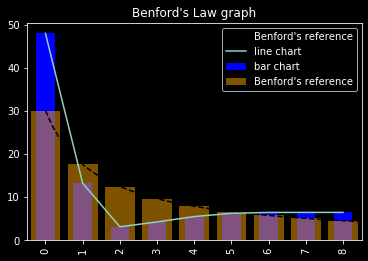

0    47.992939
1    13.281385
2     3.163203
3     4.280135
4     5.530261
5     6.277740
6     6.486734
7     6.491402
8     6.496201
dtype: float64

In [47]:
digits_s = pd.Series(updated_groups.iloc[0,].values)
create_benford_graph(digits_s, title = 'Benford\'s Law graph', label_bar_graph = 'bar chart', label_line_graph = 'line chart')

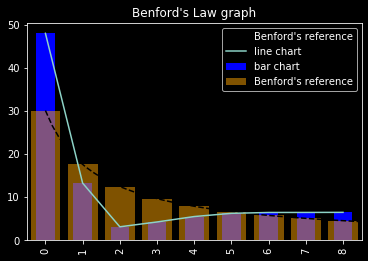

0    47.993847
1    13.285117
2     3.157385
3     4.278942
4     5.533555
5     6.281027
6     6.477340
7     6.487046
8     6.505740
dtype: float64

In [15]:
digits_s = pd.Series(updated_groups.iloc[1,].values)
create_benford_graph(digits_s, title = 'Benford\'s Law graph', label_bar_graph = 'bar chart', label_line_graph = 'line chart')

In [16]:
updated_groups.T

quality,65,66,67,68,69,70,71,72,73,74,...,86,87,88,89,90,91,92,93,94,95
crop_width,256,256,256,256,256,256,256,256,256,256,...,256,256,256,256,256,256,256,256,256,256
crop_heigth,256,256,256,256,256,256,256,256,256,256,...,256,256,256,256,256,256,256,256,256,256
cmprssd_1,47.992939,47.993847,47.992383,47.910322,47.888882,47.851960,47.887551,47.883453,47.892802,47.883259,...,47.904315,47.898887,47.900279,47.885979,47.828749,47.811737,47.858715,47.895124,47.900749,47.947179
cmprssd_2,13.281385,13.285117,13.284009,13.280570,13.313851,13.338925,13.360656,13.359088,13.346348,13.327357,...,13.315333,13.313641,13.311360,13.315292,13.400438,13.425075,13.378186,13.341814,13.344599,13.305941
cmprssd_3,3.163203,3.157385,3.160532,3.167344,3.168885,3.186097,3.194581,3.194452,3.187217,3.178268,...,3.170440,3.168350,3.156417,3.162196,3.201293,3.192124,3.168456,3.163888,3.166738,3.147560
cmprssd_4,4.280135,4.278942,4.273574,4.272668,4.282568,4.275380,4.278273,4.275018,4.273180,4.278478,...,4.276255,4.279304,4.281030,4.286190,4.306461,4.334051,4.329185,4.310980,4.309406,4.296573
cmprssd_5,5.530261,5.533555,5.537556,5.520315,5.519555,5.526183,5.560154,5.566445,5.571005,5.558126,...,5.580295,5.587872,5.580549,5.582403,5.582526,5.583257,5.584148,5.588295,5.598011,5.594072
cmprssd_6,6.277740,6.281027,6.284114,6.289188,6.279598,6.281825,6.249933,6.248847,6.261229,6.306372,...,6.304008,6.304604,6.310262,6.302459,6.261974,6.257563,6.281379,6.290604,6.293754,6.310207
cmprssd_7,6.486734,6.477340,6.472984,6.478211,6.485766,6.474755,6.449715,6.454931,6.451344,6.450498,...,6.443492,6.443585,6.452179,6.455143,6.429144,6.403262,6.415907,6.423334,6.425215,6.440336
cmprssd_8,6.491402,6.487046,6.486333,6.437313,6.427964,6.411892,6.405675,6.395230,6.396705,6.399853,...,6.411744,6.416853,6.414459,6.411472,6.402936,6.407034,6.400492,6.403037,6.393974,6.387927


In [17]:
traspossed_updated_groups = updated_groups.T

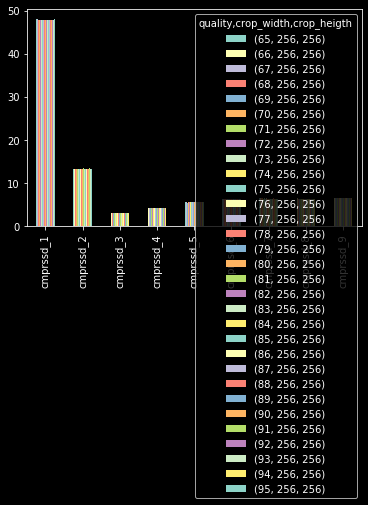

In [18]:
traspossed_updated_groups.plot(kind = 'bar')

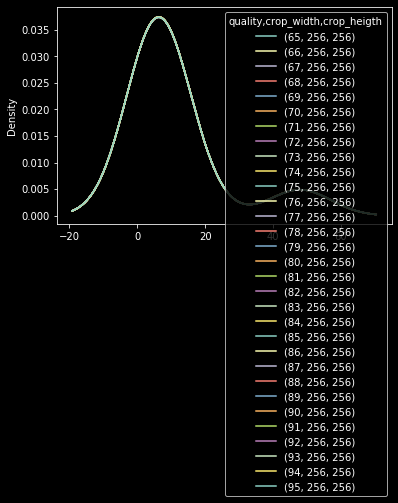

In [19]:
traspossed_updated_groups.plot(kind = 'kde')

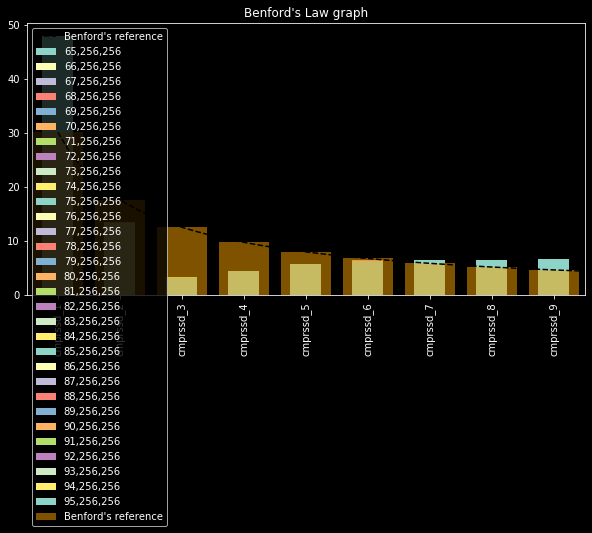

In [20]:
create_benford_graph_df(dataframe = updated_groups, title = 'Benford\'s Law graph', label_bar_graph = 'bar chart', label_line_graph = 'line chart')

In [21]:
res = groups.iloc[:, 0:9].sum(axis = 1)
res = map(lambda item: [item] * 9, res.values)

rescaling_df = pd.DataFrame(res, columns = groups.iloc[:, 0:9].columns, index = groups.iloc[:, 9:].index)
rescaling_df.head(5)

,,,gt_1,gt_2,gt_3,gt_4,gt_5,gt_6,gt_7,gt_8,gt_9
quality,crop_width,crop_heigth,,,,,,,,,
65,256,256,4587379.0,4587379.0,4587379.0,4587379.0,4587379.0,4587379.0,4587379.0,4587379.0,4587379.0
66,256,256,4587379.0,4587379.0,4587379.0,4587379.0,4587379.0,4587379.0,4587379.0,4587379.0,4587379.0
67,256,256,4587379.0,4587379.0,4587379.0,4587379.0,4587379.0,4587379.0,4587379.0,4587379.0,4587379.0
68,256,256,4587379.0,4587379.0,4587379.0,4587379.0,4587379.0,4587379.0,4587379.0,4587379.0,4587379.0
69,256,256,4587379.0,4587379.0,4587379.0,4587379.0,4587379.0,4587379.0,4587379.0,4587379.0,4587379.0


In [22]:
groups.iloc[:, 0:9] / rescaling_df

,,,gt_1,gt_2,gt_3,gt_4,gt_5,gt_6,gt_7,gt_8,gt_9
quality,crop_width,crop_heigth,,,,,,,,,
65,256,256,0.479382,0.133097,0.031487,0.043009,0.055944,0.063093,0.064419,0.063861,0.065708
66,256,256,0.479382,0.133097,0.031487,0.043009,0.055944,0.063093,0.064419,0.063861,0.065708
67,256,256,0.479382,0.133097,0.031487,0.043009,0.055944,0.063093,0.064419,0.063861,0.065708
68,256,256,0.479382,0.133097,0.031487,0.043009,0.055944,0.063093,0.064419,0.063861,0.065708
69,256,256,0.479382,0.133097,0.031487,0.043009,0.055944,0.063093,0.064419,0.063861,0.065708
70,256,256,0.479382,0.133097,0.031487,0.043009,0.055944,0.063093,0.064419,0.063861,0.065708
71,256,256,0.479382,0.133097,0.031487,0.043009,0.055944,0.063093,0.064419,0.063861,0.065708
72,256,256,0.479382,0.133097,0.031487,0.043009,0.055944,0.063093,0.064419,0.063861,0.065708
73,256,256,0.479382,0.133097,0.031487,0.043009,0.055944,0.063093,0.064419,0.063861,0.065708


In [23]:
updated_groups = groups.iloc[:, 0:9] / rescaling_df * 100

In [24]:
traspossed_updated_groups = updated_groups.T

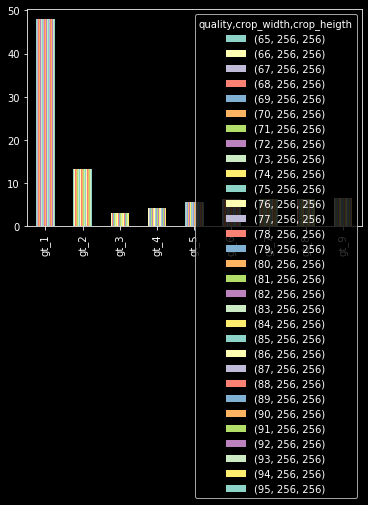

In [25]:
traspossed_updated_groups.plot(kind = 'bar')

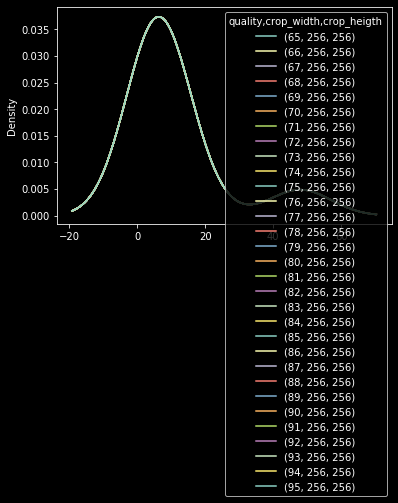

In [26]:
traspossed_updated_groups.plot(kind = 'kde')

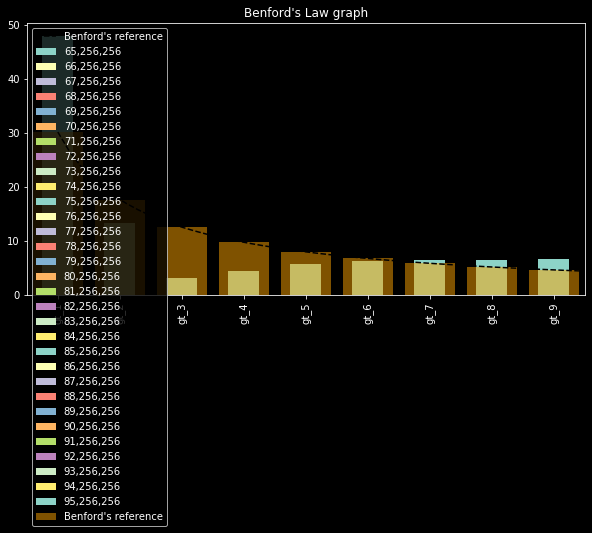

In [27]:
create_benford_graph_df(dataframe = updated_groups, title = 'Benford\'s Law graph', label_bar_graph = 'bar chart', label_line_graph = 'line chart')

In [28]:
gt_columns = [f"gt_{ii}" for ii in range(1, 10)]
cmprssd_columns = [f"cmprssd_{ii}" for ii in range(1, 10)]

In [29]:
dfs_to_concat = [benford_df.iloc[3,:][gt_columns], benford_df.iloc[3,:][cmprssd_columns]]
tmp_arr = benford_df.iloc[3,:][gt_columns].values[:,np.newaxis]
tmp_df = pd.DataFrame(tmp_arr)

tmp_arr = benford_df.iloc[3,:][cmprssd_columns].values[:,np.newaxis]
tmp_df_2 = pd.DataFrame(tmp_arr)
x_df = pd.concat([tmp_df, tmp_df_2], axis = 1, ignore_index = True)
x_df.columns = ['gt', 'cmprssd']

In [30]:
x_df

,gt,cmprssd
0,31024,31076
1,9635,9611
2,1027,1060
3,1597,1612
4,2403,2360
5,3382,3476
6,4377,4323
7,6435,6131
8,5655,5811


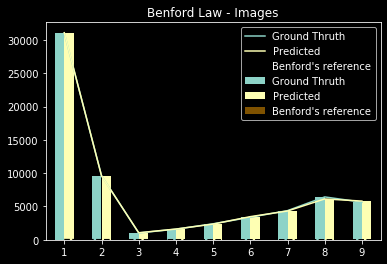

In [31]:
digits_a, digits_b = pd.Series(benford_df.iloc[3,:][gt_columns].values), pd.Series(benford_df.iloc[3,:][cmprssd_columns].values)
combine_series_benford(digits_a, digits_b)